### Generating Tail Hierarchical Bayesian Tail Models for my Type IIP Sample

This notebook will run my `TailHBMModel` module that fits a hierarchical Bayesian model to the radioactive tails of my Type IIP SN sample and generates posterior predictions for the tail light curves.

In [2]:
import os

# had to do this to prevent crashing
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tailwise.hbm import TailHBModel
import arviz as az
from tailwise.plotting import plot_tail_models

__file__ = os.path.abspath('')
PLOTS_DIR = Path(__file__).resolve().parents[0] / "plots" / "tail_hbm"
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

In [1]:
%load_ext autoreload
%autoreload 2

Most of the code that does a large part of the data cleaning and preparation for model fitting is in `TailHBModel`. A lot of the development for this was done in a Jupyter notebook before being moved there. I will discuss the most significant points of this process here:
- Before fitting the model, I made sure to remove my anomolous SNe. **We do not expect them to follow the population or hold normal radioactive tail behavior**. In order to do this, I simply removed tails with ZTF r-band drops that fell outside of the 16-84% percentiles.
- Furthermore, I performed per-SN least squares fits ($\log{F} = \alpha+\beta t$) so that I can grab the mean  of the fitted $\alpha$, $\beta$ of the filtered SNe to use as initial guesses for my hiearchical model.

In [3]:
m = TailHBModel()
df_clean = m.clean_data()

/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i
No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i
No data for band ZTF_i
No data for band ZTF_i
No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, me

No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


No data for band ZTF_i
No data for band ZTF_i


/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Not enough points for fitting.
Not enough points for fitting.
Not enough points for fitting.
Not enough points for fitting.


In [4]:
df_clean.head(10)

oid  delta_mag   band           mjd        t0       phase  \
0  ZTF24aaplfjd       -1.3  ZTF_g  60578.308831  60577.57    0.738831   
1  ZTF24aaplfjd       -1.3  ZTF_g  60578.324248  60577.57    0.754248   
2  ZTF24aaplfjd       -1.3  ZTF_g  60579.316215  60577.57    1.746215   
3  ZTF24aaplfjd       -1.3  ZTF_g  60691.111470  60577.57  113.541470   
4  ZTF24aaplfjd       -1.3  ZTF_g  60591.350799  60577.57   13.780799   
5  ZTF24aaplfjd       -1.3  ZTF_g  60592.365914  60577.57   14.795914   
6  ZTF24aaplfjd       -1.3  ZTF_g  60592.381042  60577.57   14.811042   
7  ZTF24aaplfjd       -1.3  ZTF_g  60593.312396  60577.57   15.742396   
8  ZTF24aaplfjd       -1.3  ZTF_g  60594.300972  60577.57   16.730972   
9  ZTF24aaplfjd       -1.3  ZTF_g  60594.433843  60577.57   16.863843   

   flux_mJy  flux_err_mJy  lim_flux_mJy  sn_idx  band_idx  normal_sample  \
0  0.013723      0.002483           NaN       0         0           True   
1  0.014617      0.002670           NaN       0         0           True   
2  0.014007      0.002804           NaN       0         0           True   
3  0.011584      0.003777           NaN       0         0           True   
4       NaN           NaN      0.013820       0         0           True   
5       NaN           NaN      0.014599       0         0           True   
6       NaN           NaN      0.014623       0         0           True   
7       NaN           NaN      0.012259       0         0           True   
8       NaN           NaN      0.014035       0         0           True   
9       NaN           NaN      0.016991       0         0           True   

   ls_alpha   ls_beta  ls_sigma_alpha  ls_sigma_beta     ls_chi2  ls_red_chi2  
0 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
1 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
2 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
3 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
4 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
5 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
6 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
7 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
8 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699  
9 -1.320042 -0.005201        0.015289       0.000337  132.823573     4.743699

My cleaned dataset has all the `flux_mJy`, `flux_err_mJy`, `lim_flux_mJy` of the ZTF band detections, their `phase` relative to tail start (`t0`), a unique `sn_idx`, the `normal_sample` flag, and the least squares results.

I now prepare the arrays ($x$: `phase`, $y$:`flux_mJy`) for the PyMC model.

In [5]:
x, y, yerr, sn_idx = m.prepare_data()

Now, I build and fit the model. While developing this project I ran into how CPU-intensive the sampling is. I suggest if following my work just reading in the inference data that I save in `data/fits/tail_hbm_inference.nc`.

In [6]:
m.build_model()
idata = m.fit_model(draws=2000, tune=3000, chains=6, cores=6, target_accept=0.99, random_seed=42)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [mu_alpha, sigma_alpha, mu_beta, sigma_beta, sigma_int, alpha, beta]


Output()

/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)
/home/cal/analam/miniconda3/envs/tailwise/lib/python3.11/site-packages/pymc/step_methods/hmc/quadpotential.py:316: RuntimeWarning: overflow encountered in dot
  return 0.5 * np.dot(x, v_out)


Sampling 6 chains for 3_000 tune and 2_000 draw iterations (18_000 + 12_000 draws total) took 34 seconds.


Saved inference data to /home/cal/analam/Documents/astroskills_final/data/fits/tail_hbm_inference.nc


Using Arviz, I can grab the population hyperparameters and make some diagnostic plots of the posteriors.

In [7]:
trace = az.from_netcdf("/home/cal/analam/Documents/astroskills_final/data/fits/tail_hbm_inference.nc")

In [8]:
az.summary(
    trace,
    var_names=["mu_alpha", "sigma_alpha", "mu_beta", "sigma_beta", "sigma_int"],
    round_to=6
)

mean        sd    hdi_3%   hdi_97%  mcse_mean   mcse_sd  \
mu_alpha    -1.264340  0.036696 -1.333805 -1.195912   0.000296  0.000358   
sigma_alpha  0.304888  0.026679  0.256231  0.355779   0.000210  0.000266   
mu_beta     -0.003462  0.000288 -0.004019 -0.002935   0.000003  0.000002   
sigma_beta   0.001950  0.000241  0.001505  0.002387   0.000003  0.000002   
sigma_int    0.077456  0.001898  0.074066  0.081131   0.000016  0.000017   

                 ess_bulk     ess_tail     r_hat  
mu_alpha     15358.580491  8268.232024  1.000180  
sigma_alpha  17029.304998  8780.151860  1.000593  
mu_beta      11170.239673  9021.883363  1.000153  
sigma_beta    6678.175050  8938.174030  1.000571  
sigma_int    14209.344147  9353.345223  0.999988

In [18]:
pred_df = m.predict_tail("ZTF21abvcxel")

OID ZTF24aabppgn not in fitted data.


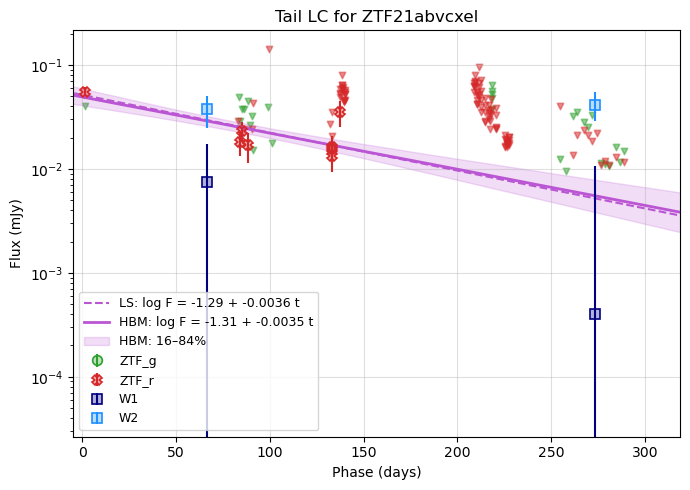

In [10]:
plot_tail_models("ZTF21abvcxel", df_clean, pred_df)

Plotting 72 SNe


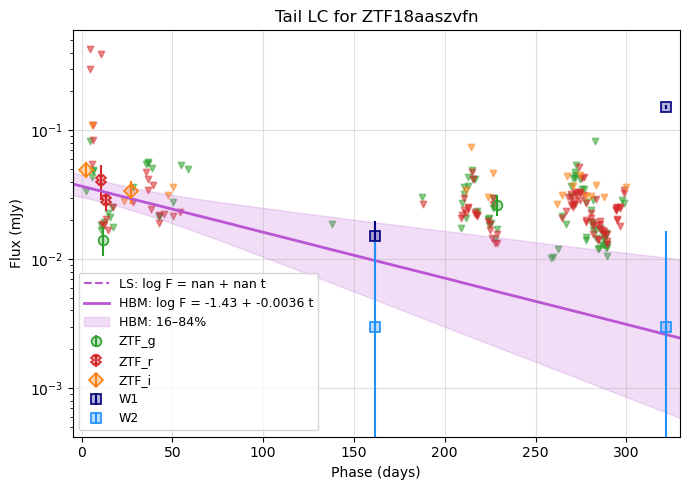

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF18aaszvfn_tail_model.png


<Figure size 640x480 with 0 Axes>

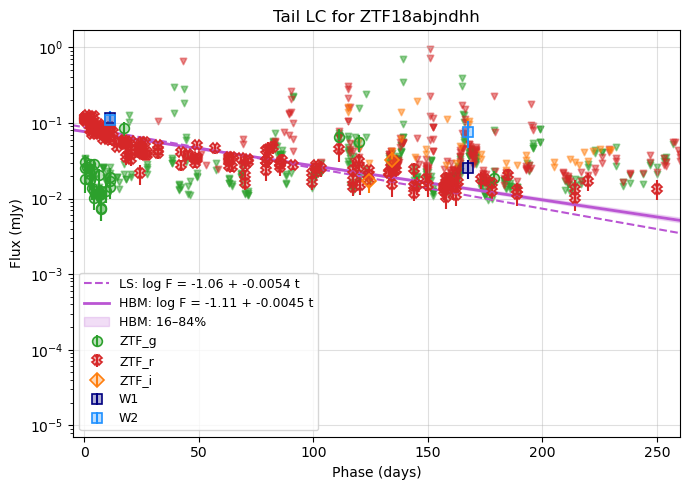

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF18abjndhh_tail_model.png


<Figure size 640x480 with 0 Axes>

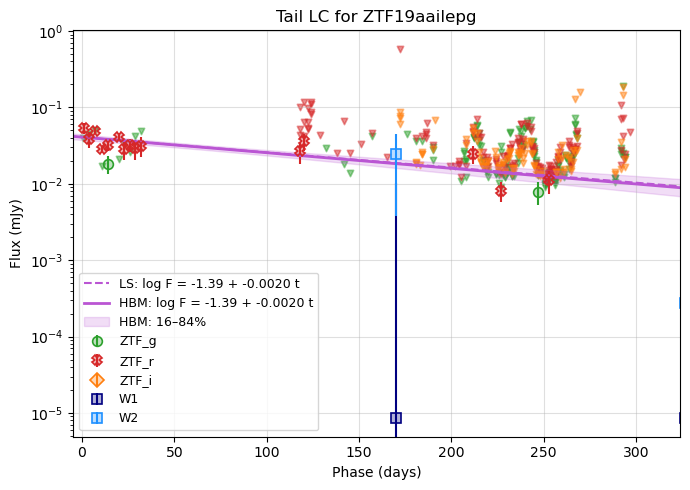

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aailepg_tail_model.png


<Figure size 640x480 with 0 Axes>

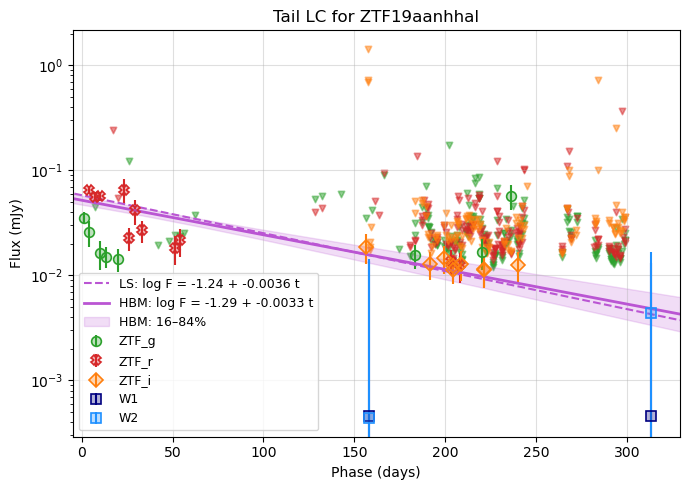

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aanhhal_tail_model.png


<Figure size 640x480 with 0 Axes>

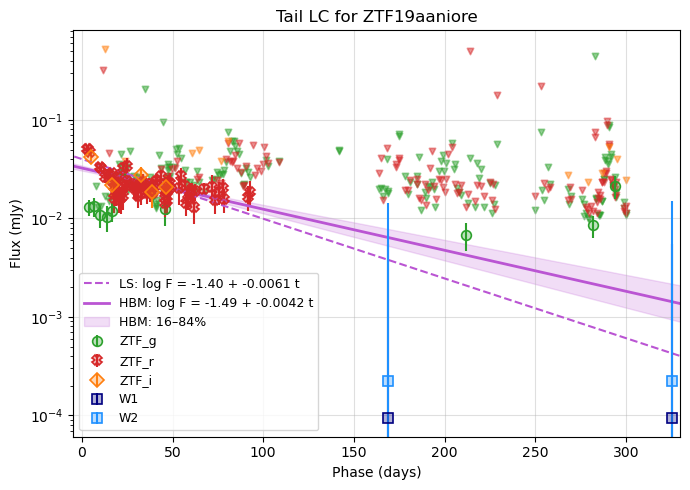

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aaniore_tail_model.png


<Figure size 640x480 with 0 Axes>

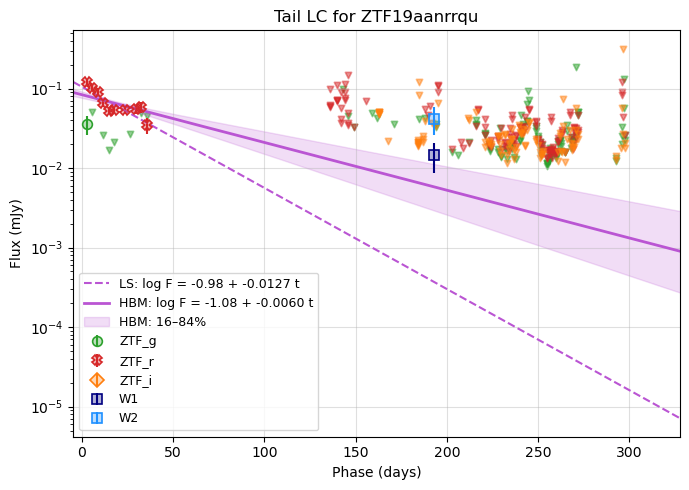

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aanrrqu_tail_model.png


<Figure size 640x480 with 0 Axes>

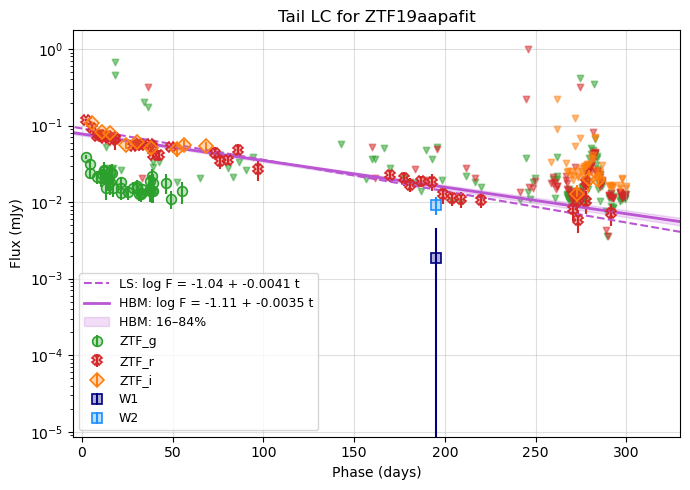

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aapafit_tail_model.png


<Figure size 640x480 with 0 Axes>

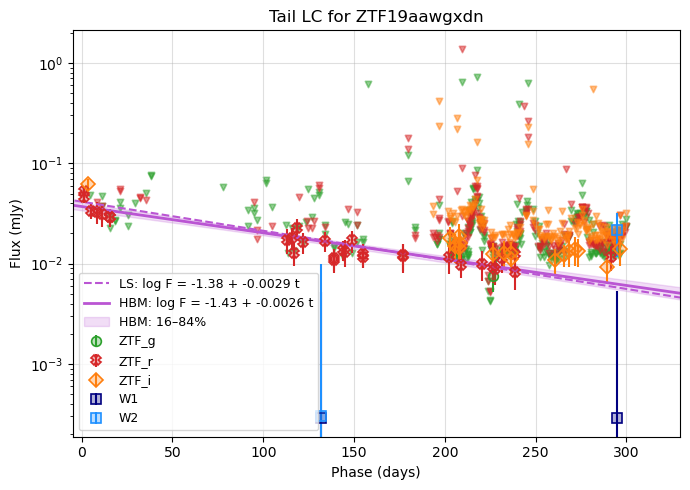

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aawgxdn_tail_model.png


<Figure size 640x480 with 0 Axes>

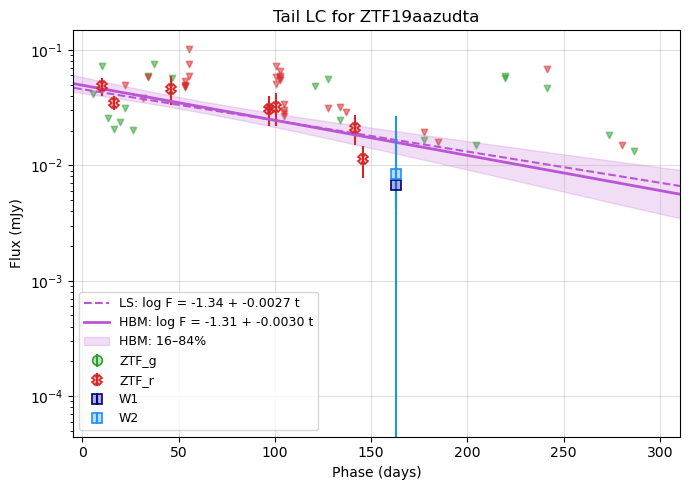

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aazudta_tail_model.png


<Figure size 640x480 with 0 Axes>

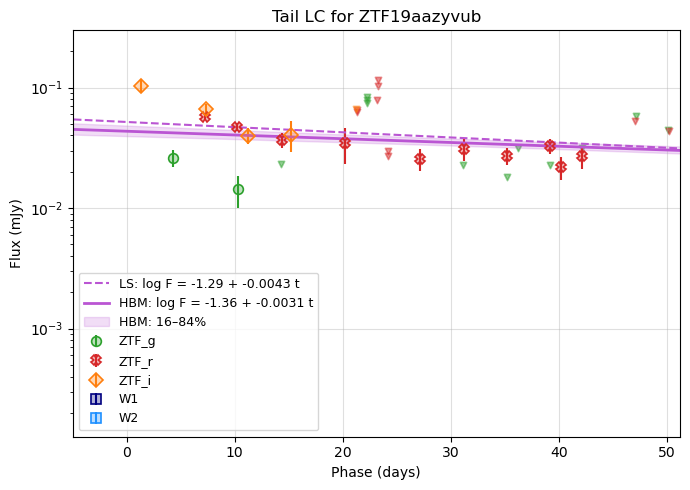

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19aazyvub_tail_model.png


<Figure size 640x480 with 0 Axes>

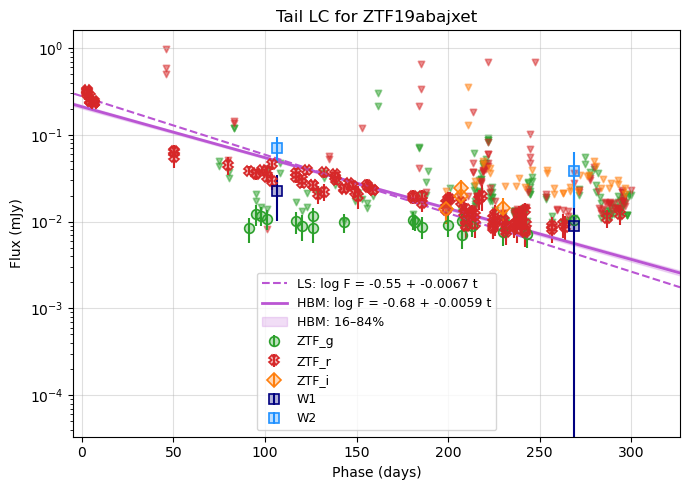

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19abajxet_tail_model.png


<Figure size 640x480 with 0 Axes>

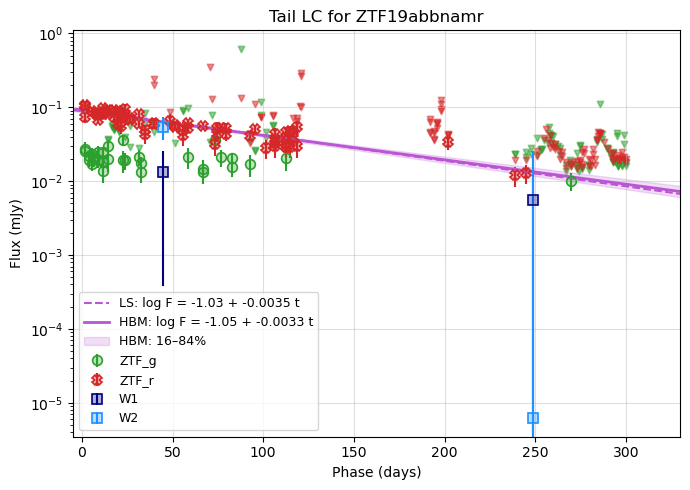

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19abbnamr_tail_model.png


<Figure size 640x480 with 0 Axes>

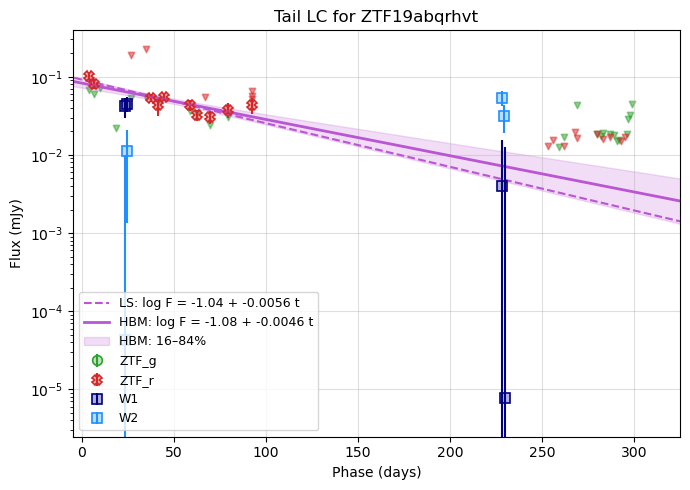

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19abqrhvt_tail_model.png


<Figure size 640x480 with 0 Axes>

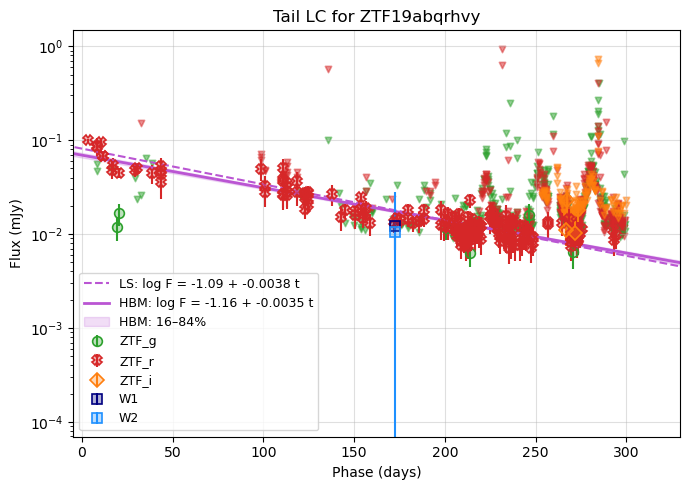

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19abqrhvy_tail_model.png


<Figure size 640x480 with 0 Axes>

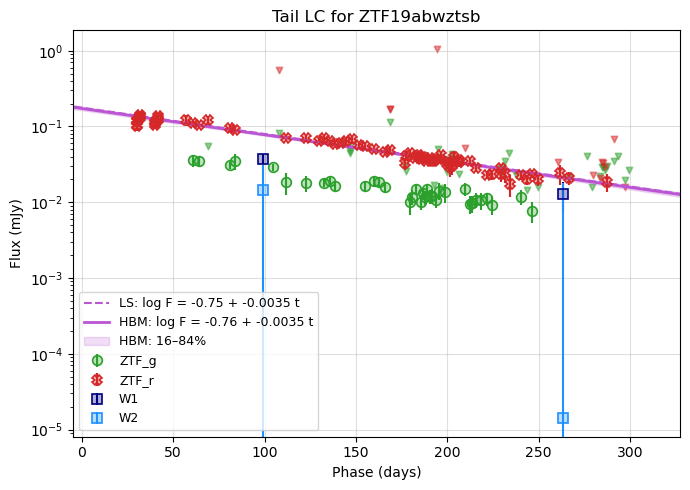

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19abwztsb_tail_model.png


<Figure size 640x480 with 0 Axes>

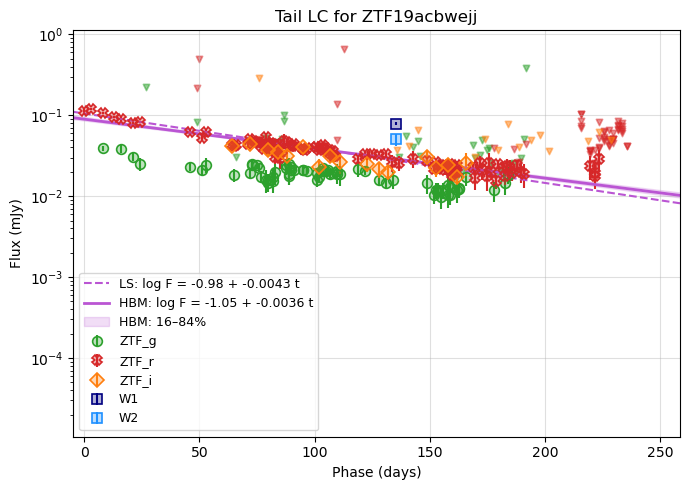

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19acbwejj_tail_model.png


<Figure size 640x480 with 0 Axes>

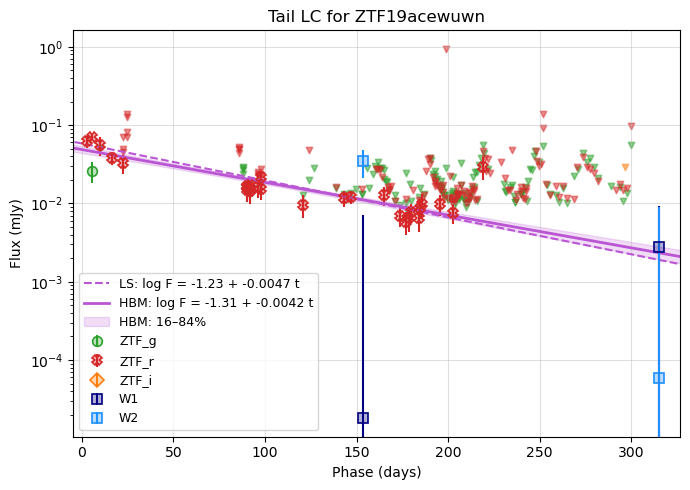

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19acewuwn_tail_model.png


<Figure size 640x480 with 0 Axes>

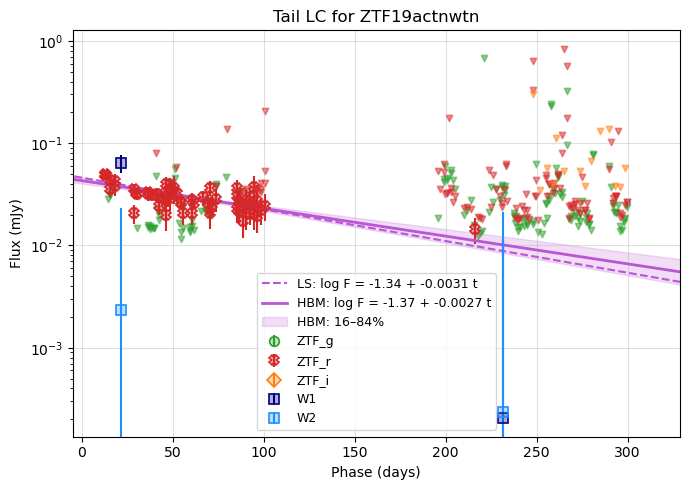

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19actnwtn_tail_model.png


<Figure size 640x480 with 0 Axes>

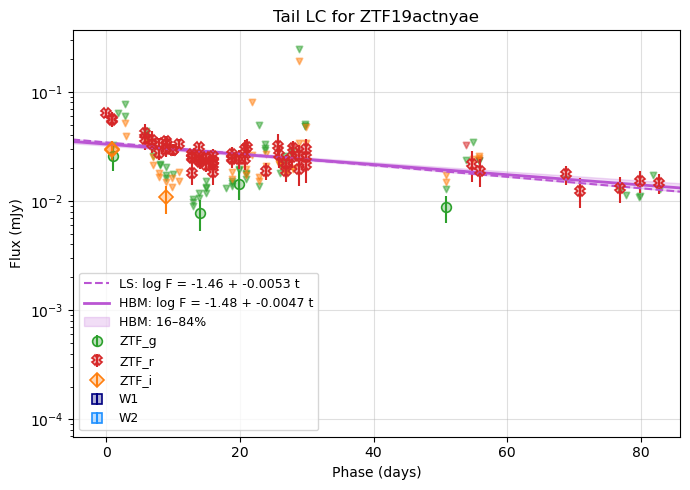

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19actnyae_tail_model.png


<Figure size 640x480 with 0 Axes>

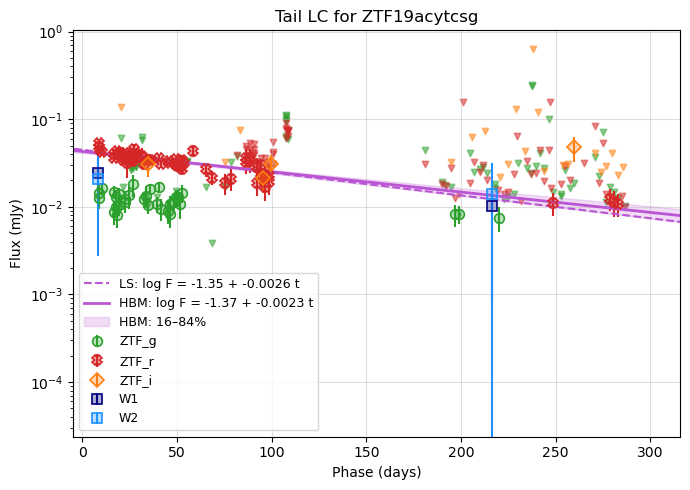

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF19acytcsg_tail_model.png


<Figure size 640x480 with 0 Axes>

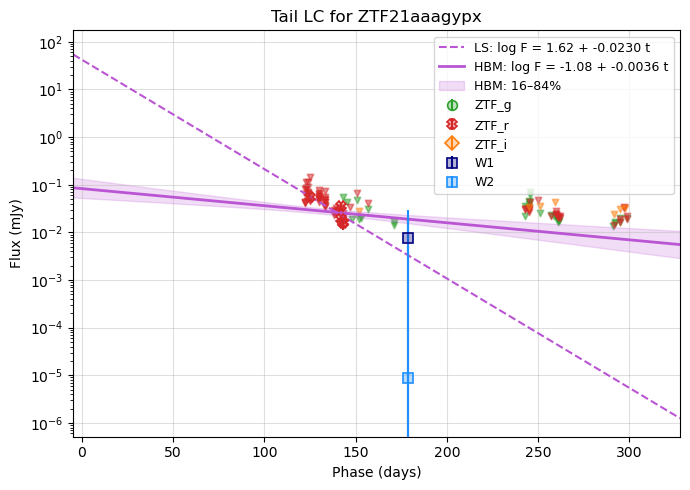

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aaagypx_tail_model.png


<Figure size 640x480 with 0 Axes>

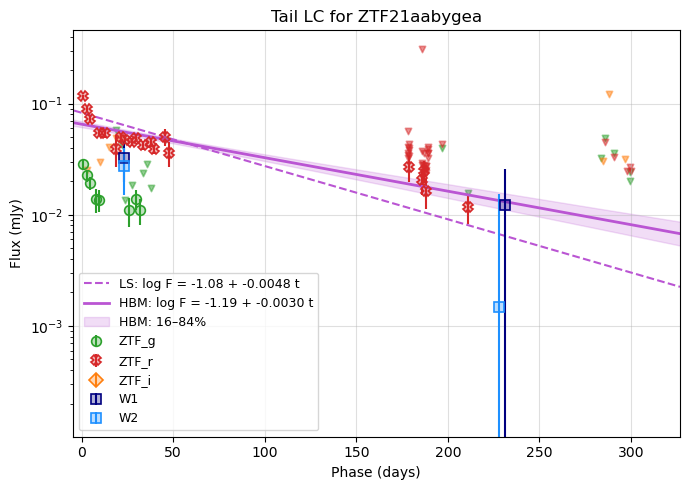

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aabygea_tail_model.png


<Figure size 640x480 with 0 Axes>

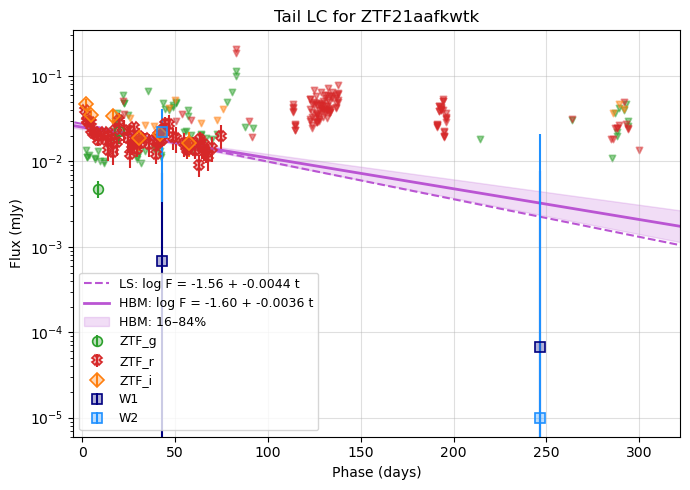

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aafkwtk_tail_model.png


<Figure size 640x480 with 0 Axes>

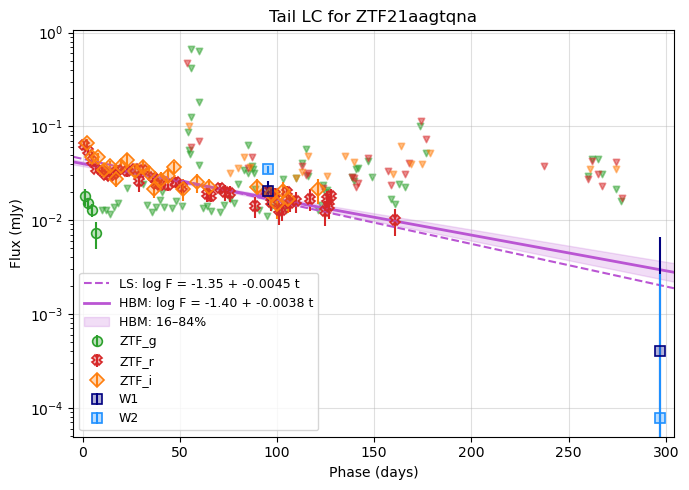

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aagtqna_tail_model.png


<Figure size 640x480 with 0 Axes>

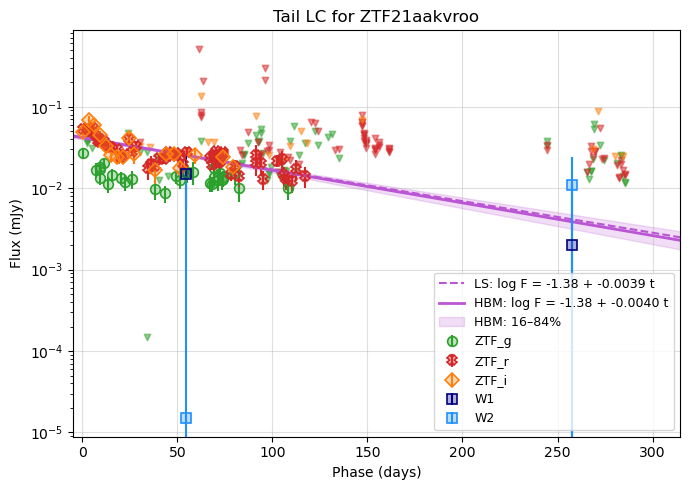

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aakvroo_tail_model.png


<Figure size 640x480 with 0 Axes>

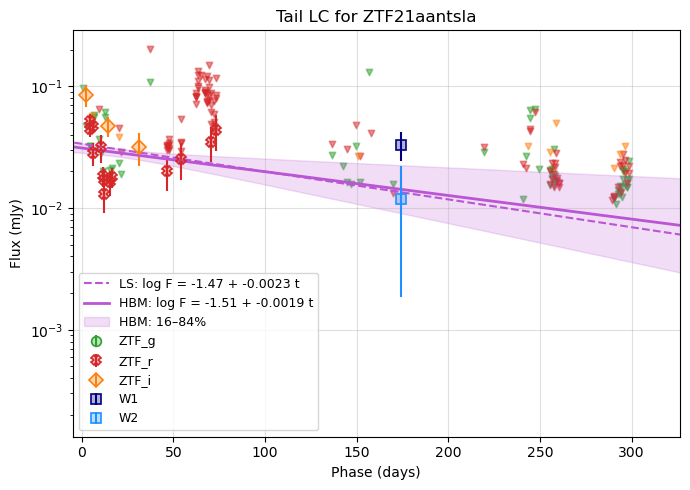

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aantsla_tail_model.png


<Figure size 640x480 with 0 Axes>

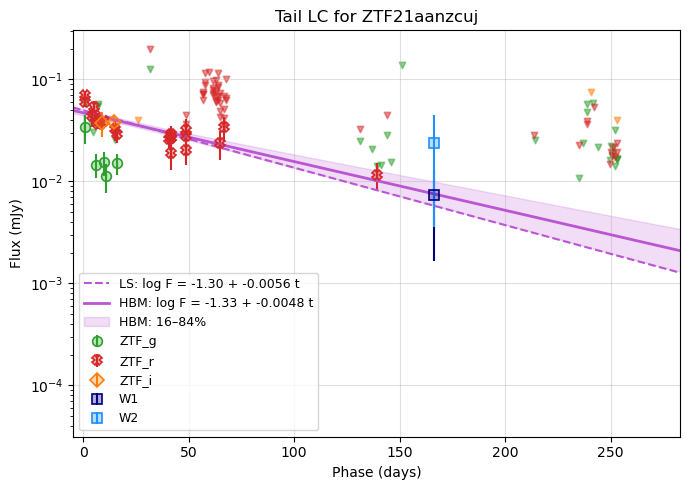

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aanzcuj_tail_model.png


<Figure size 640x480 with 0 Axes>

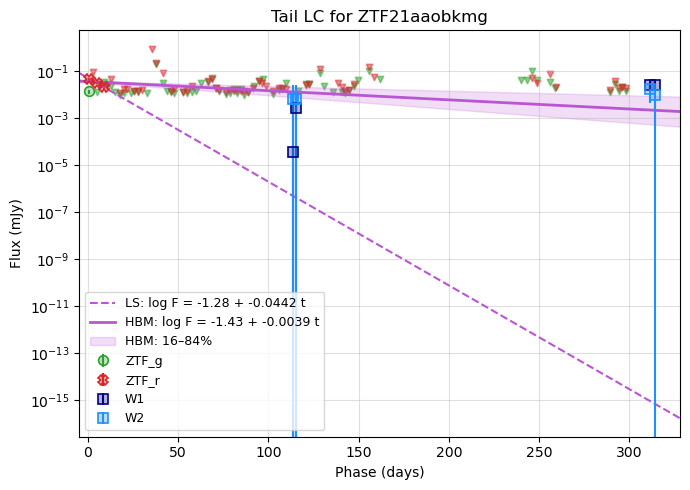

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aaobkmg_tail_model.png


<Figure size 640x480 with 0 Axes>

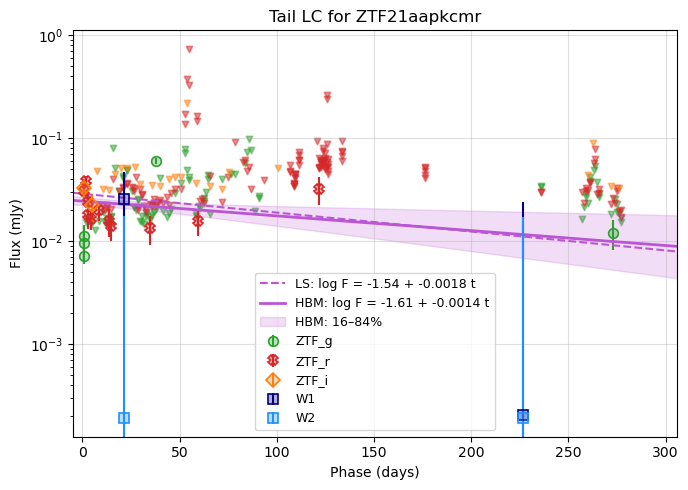

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aapkcmr_tail_model.png


<Figure size 640x480 with 0 Axes>

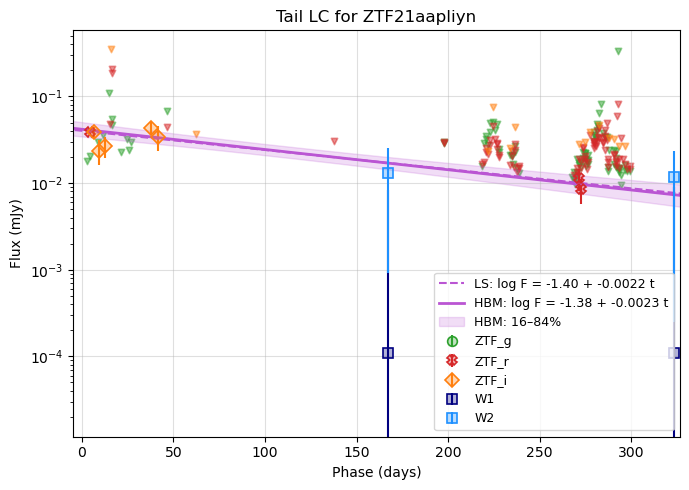

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aapliyn_tail_model.png


<Figure size 640x480 with 0 Axes>

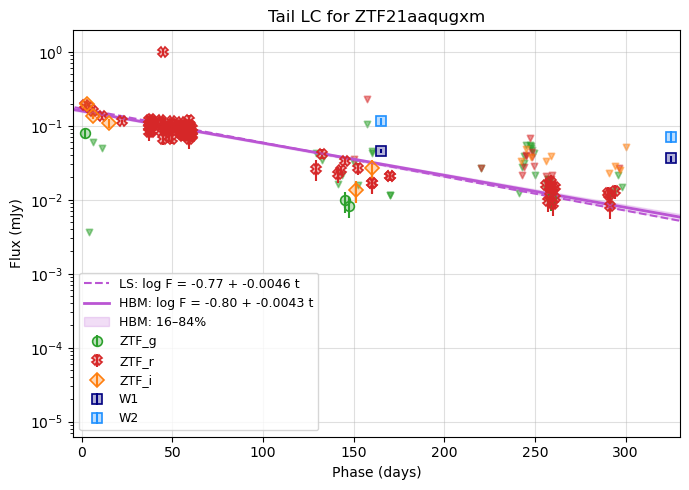

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aaqugxm_tail_model.png


<Figure size 640x480 with 0 Axes>

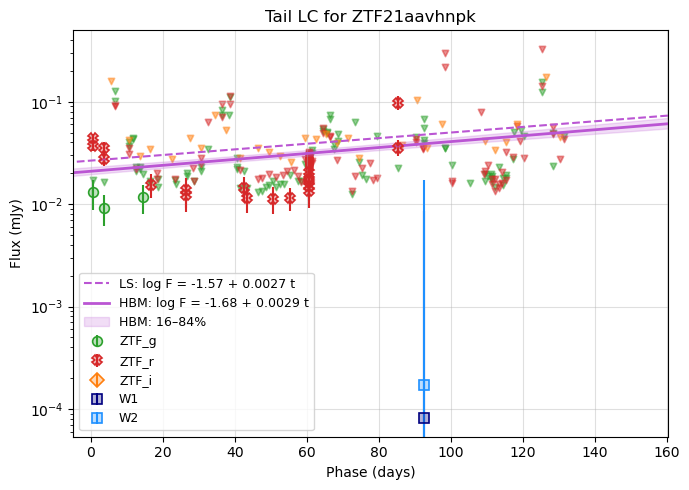

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21aavhnpk_tail_model.png


<Figure size 640x480 with 0 Axes>

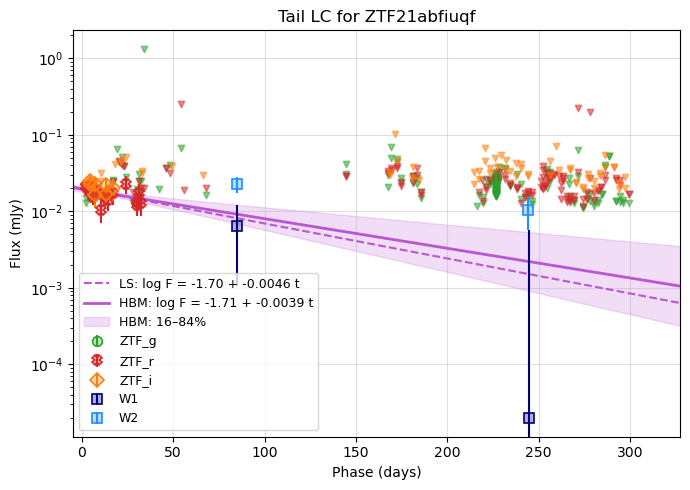

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abfiuqf_tail_model.png


<Figure size 640x480 with 0 Axes>

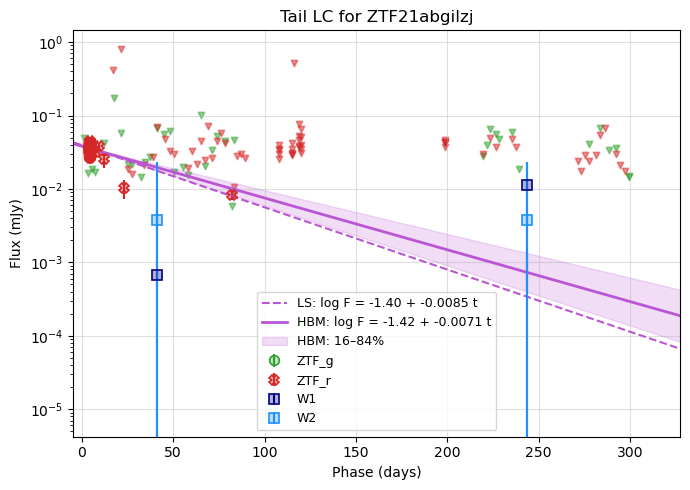

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abgilzj_tail_model.png


<Figure size 640x480 with 0 Axes>

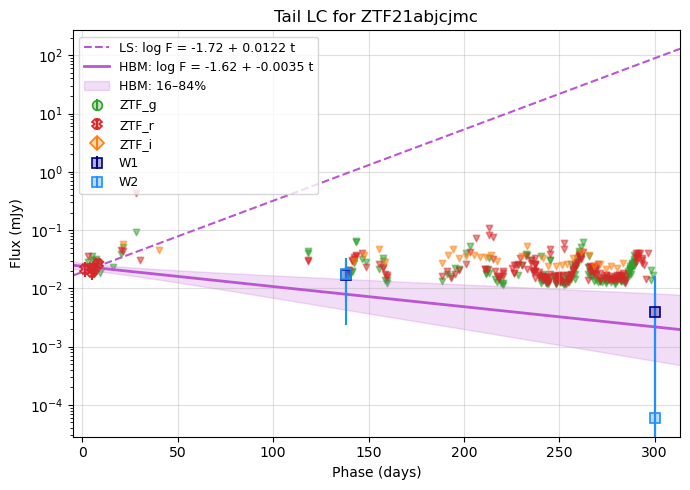

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abjcjmc_tail_model.png


<Figure size 640x480 with 0 Axes>

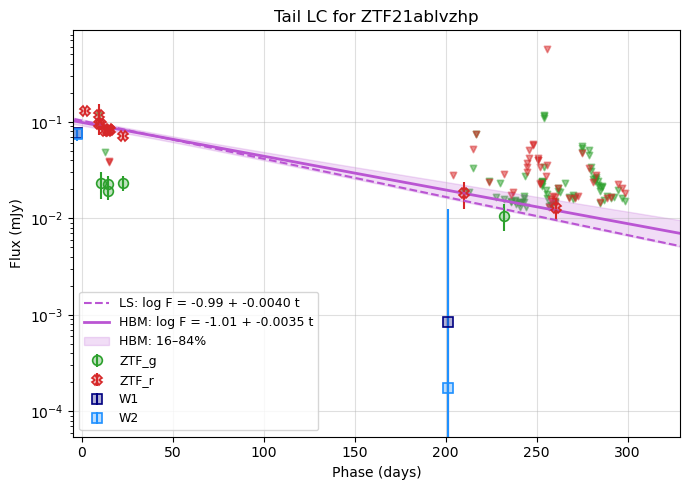

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21ablvzhp_tail_model.png


<Figure size 640x480 with 0 Axes>

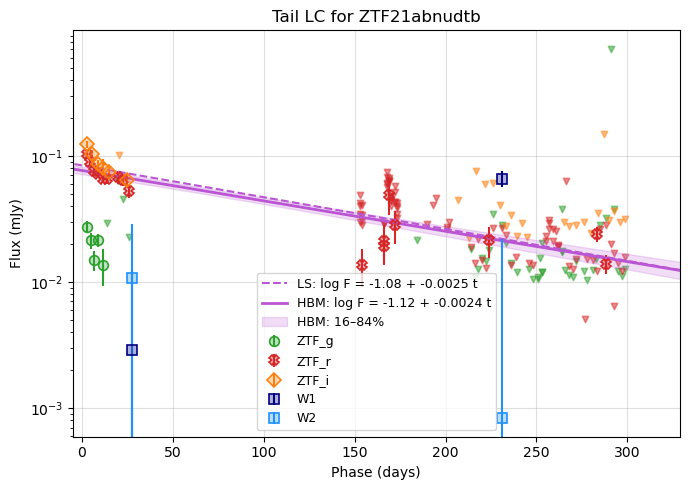

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abnudtb_tail_model.png


<Figure size 640x480 with 0 Axes>

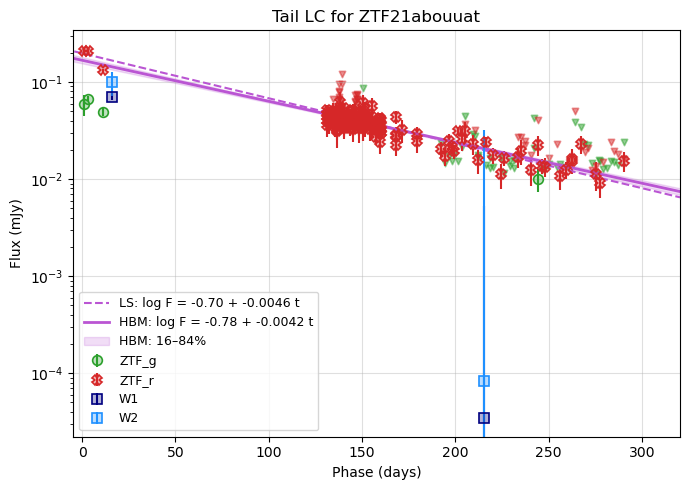

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abouuat_tail_model.png


<Figure size 640x480 with 0 Axes>

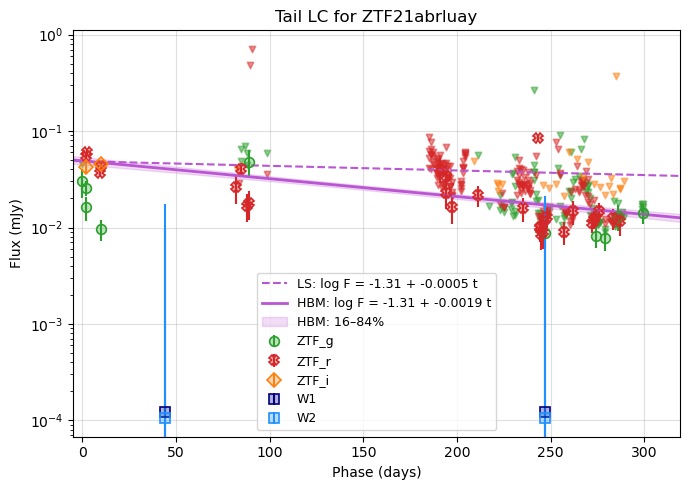

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abrluay_tail_model.png


<Figure size 640x480 with 0 Axes>

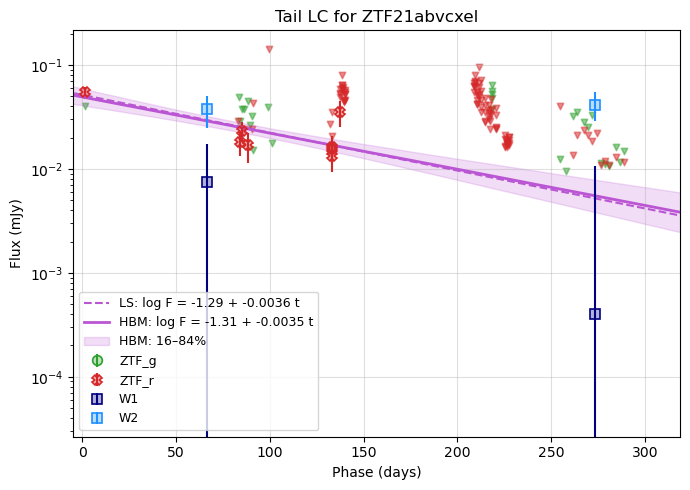

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21abvcxel_tail_model.png


<Figure size 640x480 with 0 Axes>

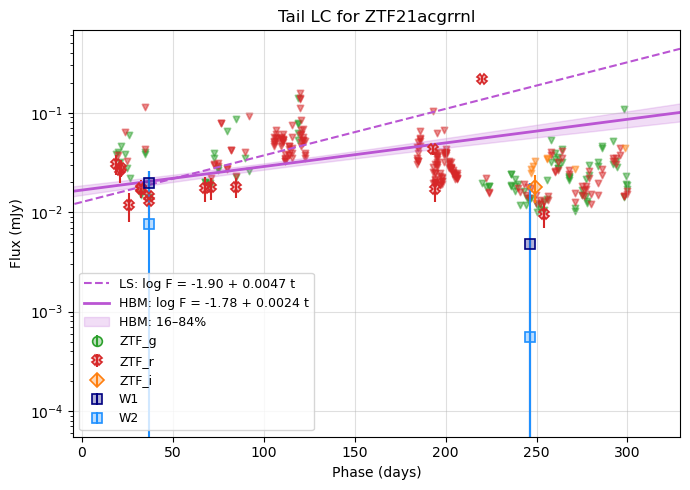

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF21acgrrnl_tail_model.png


<Figure size 640x480 with 0 Axes>

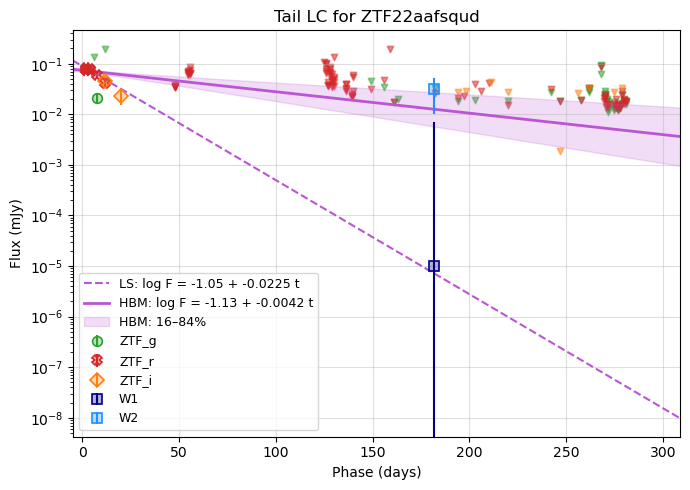

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aafsqud_tail_model.png


<Figure size 640x480 with 0 Axes>

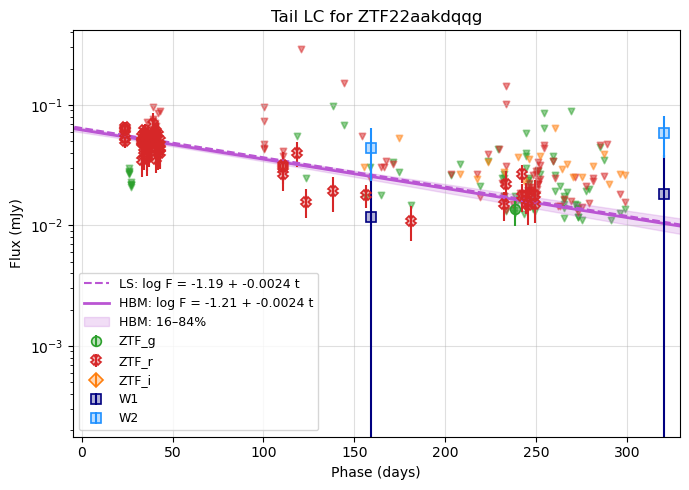

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aakdqqg_tail_model.png


<Figure size 640x480 with 0 Axes>

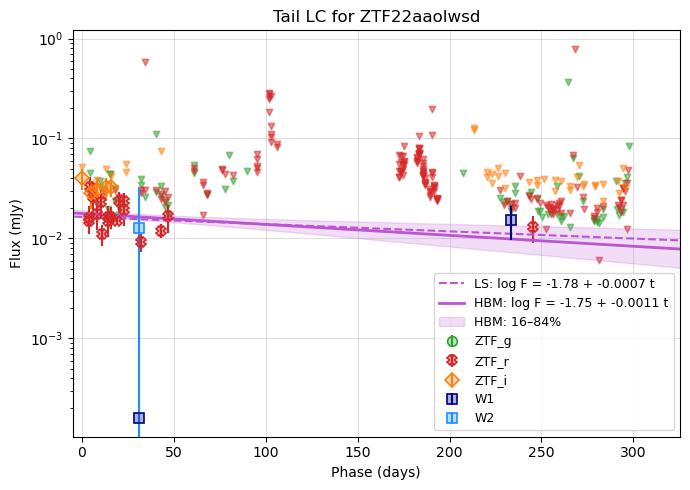

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aaolwsd_tail_model.png


<Figure size 640x480 with 0 Axes>

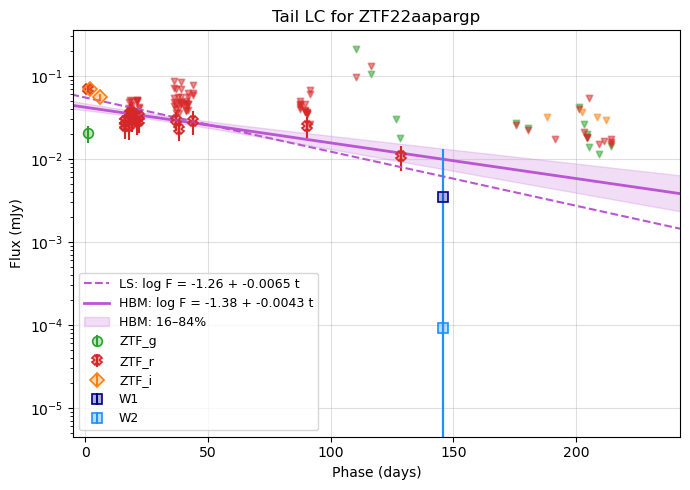

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aapargp_tail_model.png


<Figure size 640x480 with 0 Axes>

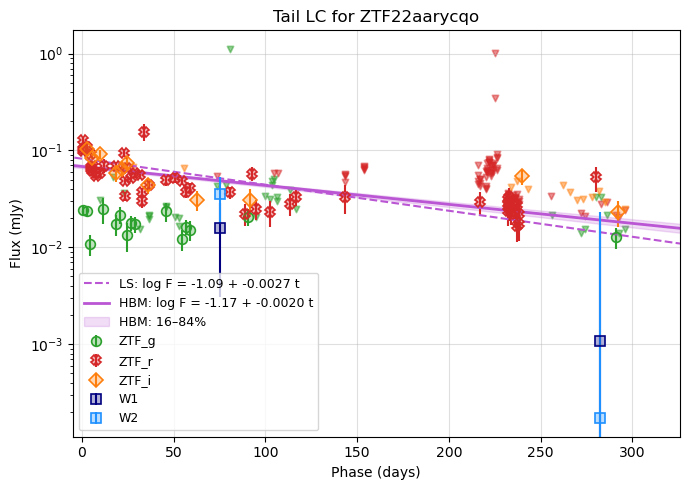

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aarycqo_tail_model.png


<Figure size 640x480 with 0 Axes>

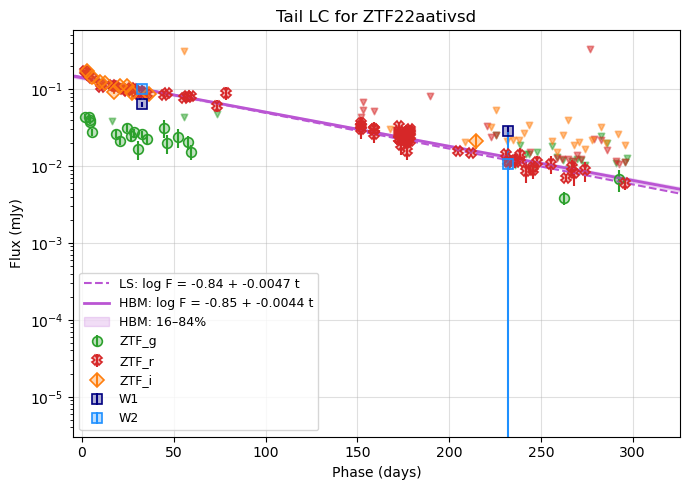

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aativsd_tail_model.png


<Figure size 640x480 with 0 Axes>

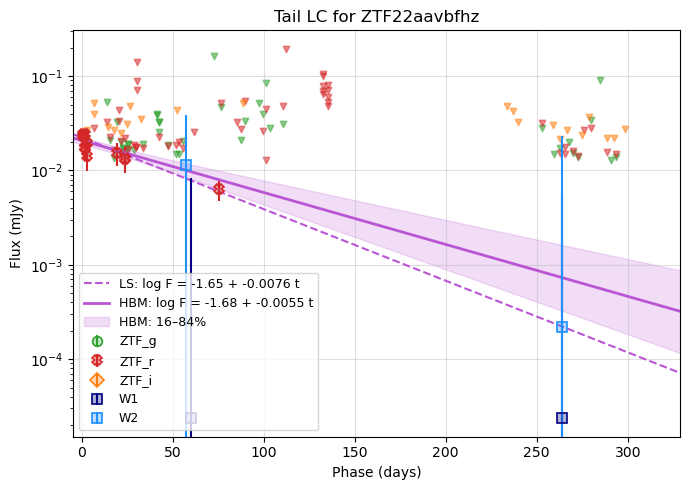

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aavbfhz_tail_model.png


<Figure size 640x480 with 0 Axes>

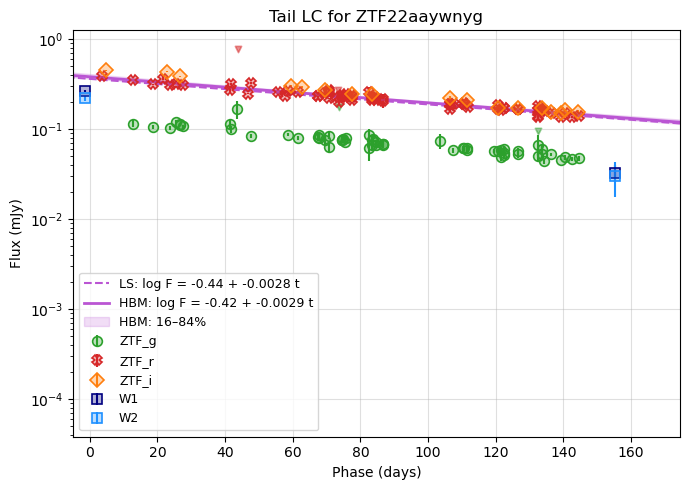

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aaywnyg_tail_model.png


<Figure size 640x480 with 0 Axes>

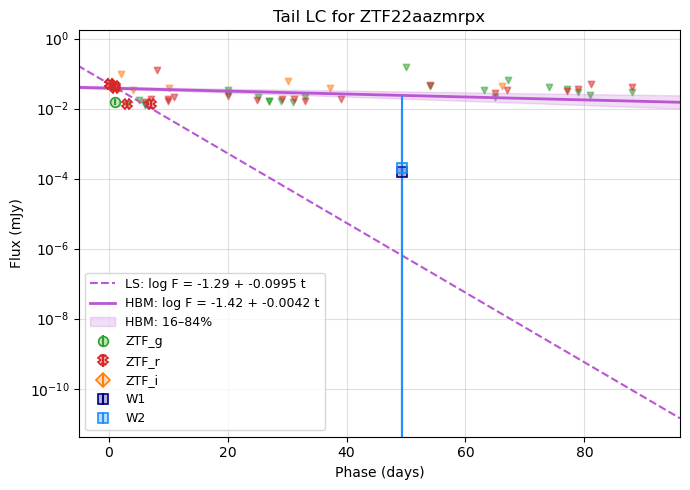

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22aazmrpx_tail_model.png


<Figure size 640x480 with 0 Axes>

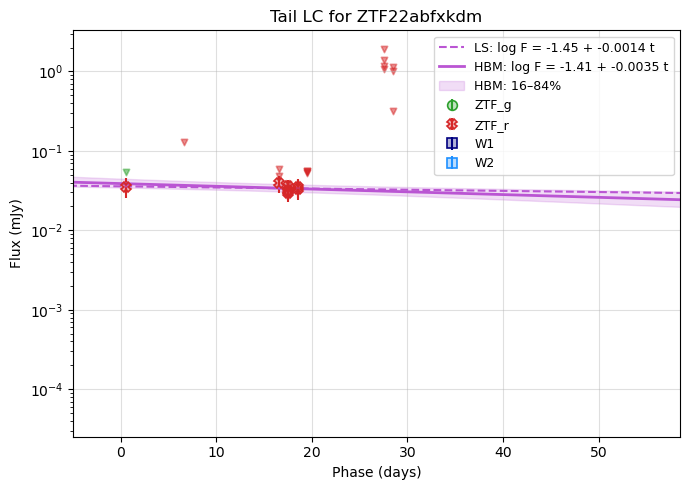

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22abfxkdm_tail_model.png


<Figure size 640x480 with 0 Axes>

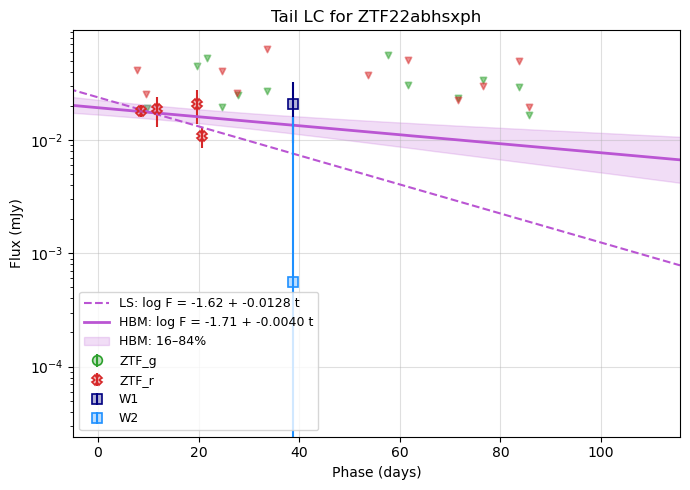

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22abhsxph_tail_model.png


<Figure size 640x480 with 0 Axes>

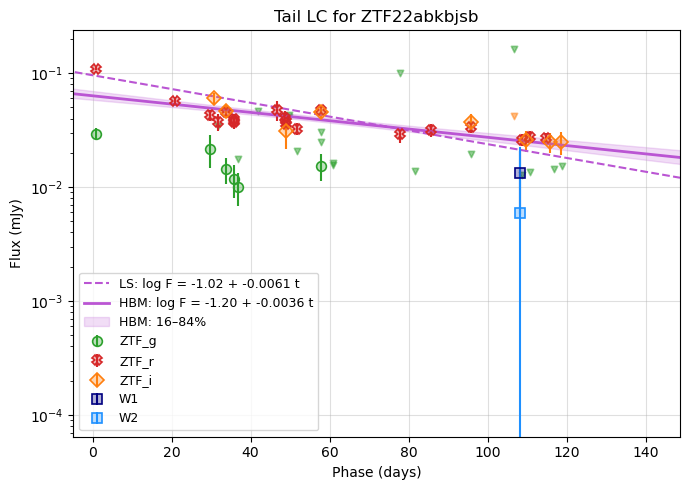

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22abkbjsb_tail_model.png


<Figure size 640x480 with 0 Axes>

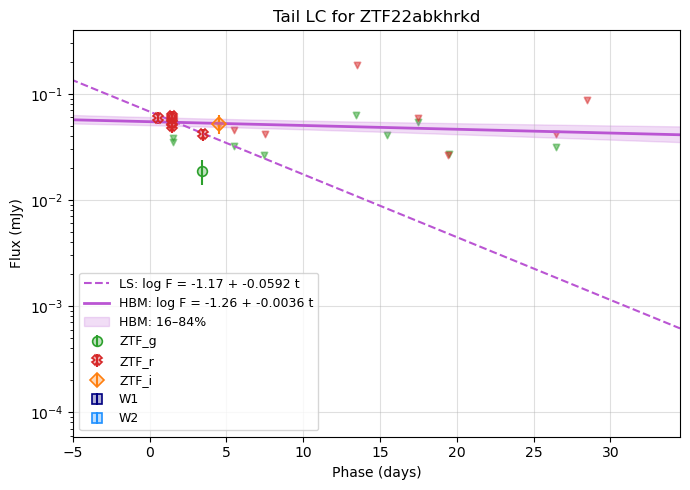

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22abkhrkd_tail_model.png


<Figure size 640x480 with 0 Axes>

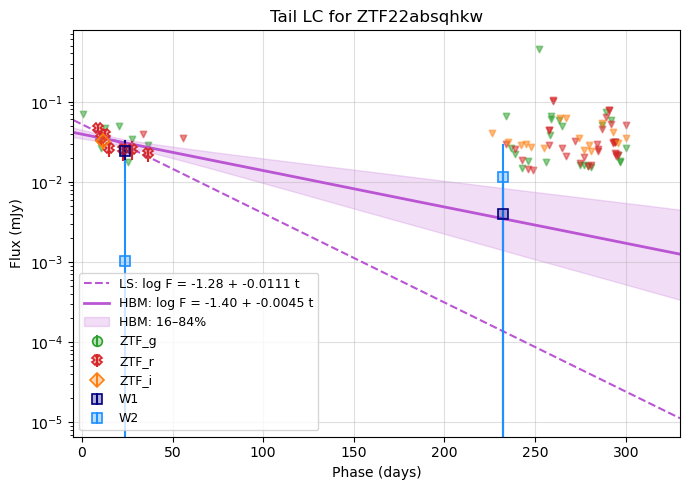

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22absqhkw_tail_model.png


<Figure size 640x480 with 0 Axes>

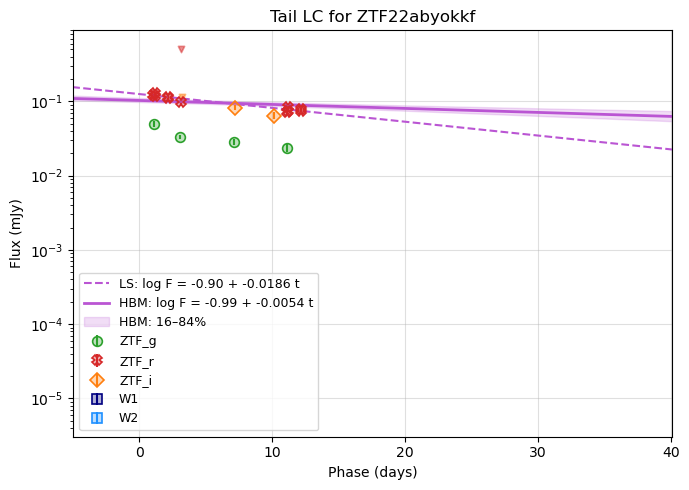

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF22abyokkf_tail_model.png


<Figure size 640x480 with 0 Axes>

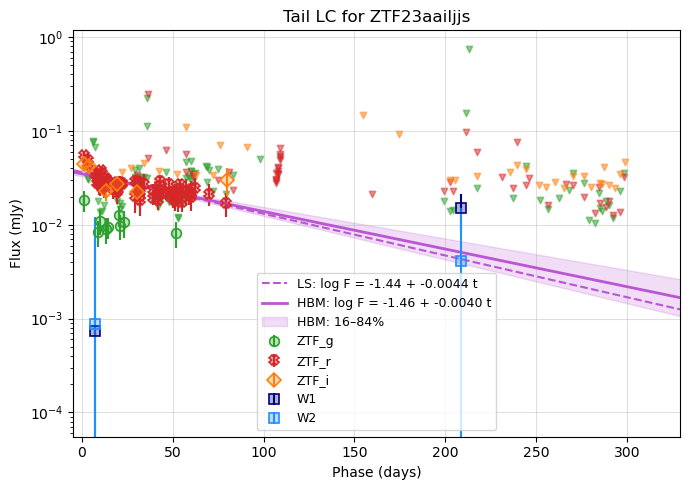

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23aailjjs_tail_model.png


<Figure size 640x480 with 0 Axes>

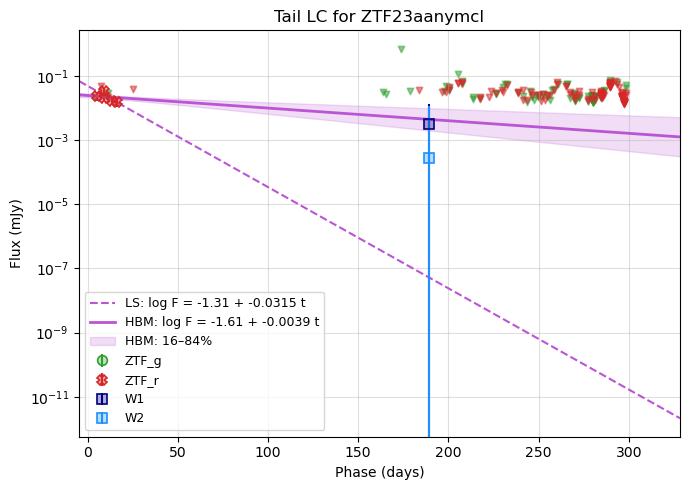

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23aanymcl_tail_model.png


<Figure size 640x480 with 0 Axes>

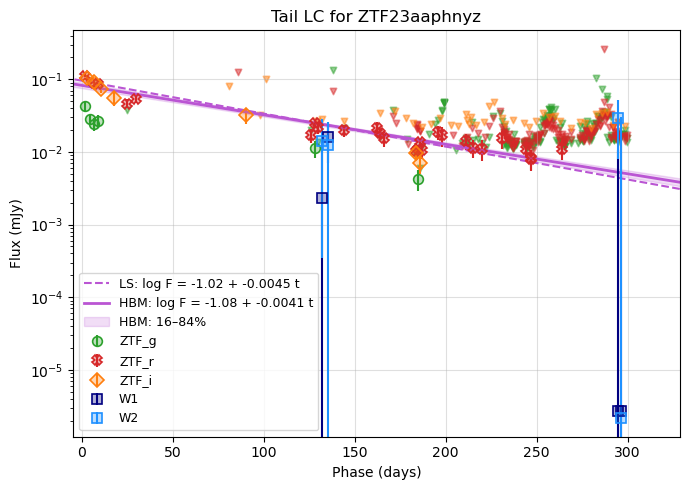

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23aaphnyz_tail_model.png


<Figure size 640x480 with 0 Axes>

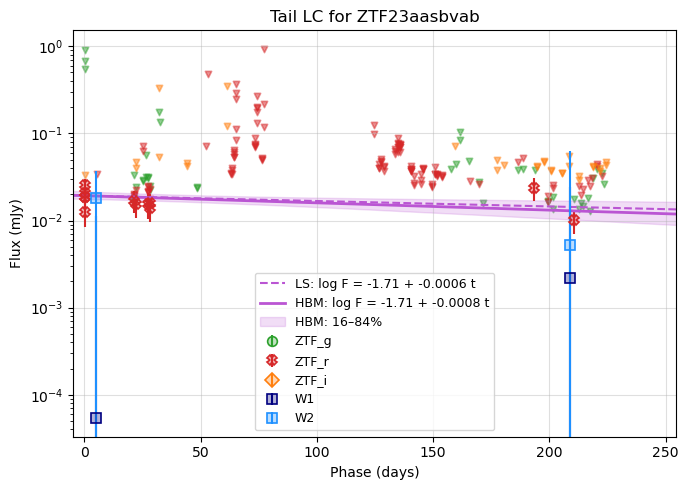

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23aasbvab_tail_model.png


<Figure size 640x480 with 0 Axes>

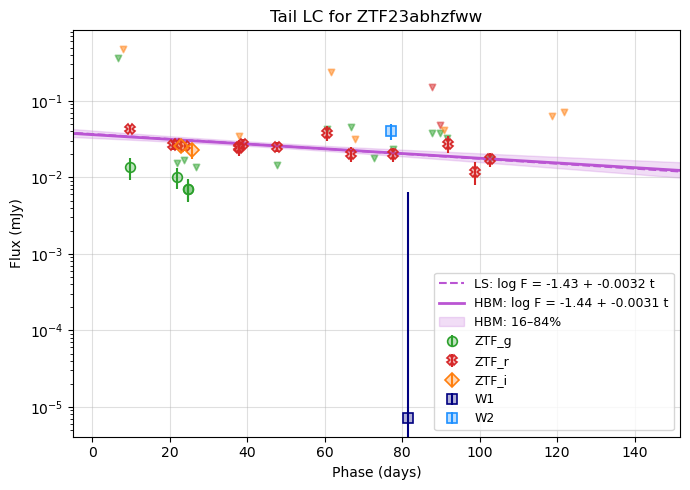

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23abhzfww_tail_model.png


<Figure size 640x480 with 0 Axes>

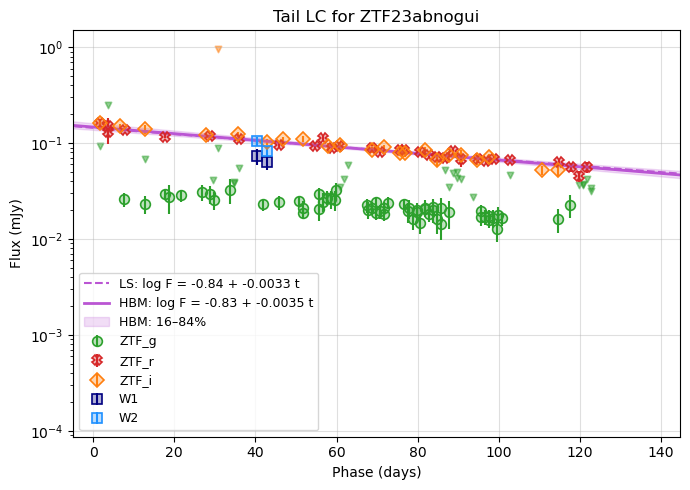

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF23abnogui_tail_model.png


<Figure size 640x480 with 0 Axes>

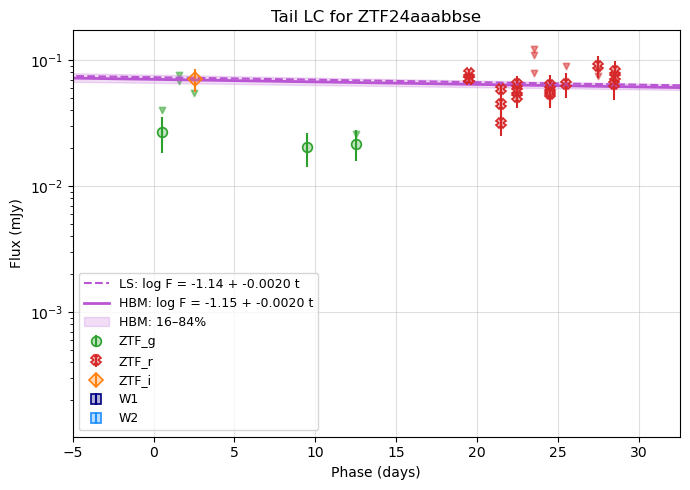

Saved plot to /home/cal/analam/Documents/astroskills_final/plots/tail_hbm/ZTF24aaabbse_tail_model.png
OID ZTF24aabppgn not in fitted data.


TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>

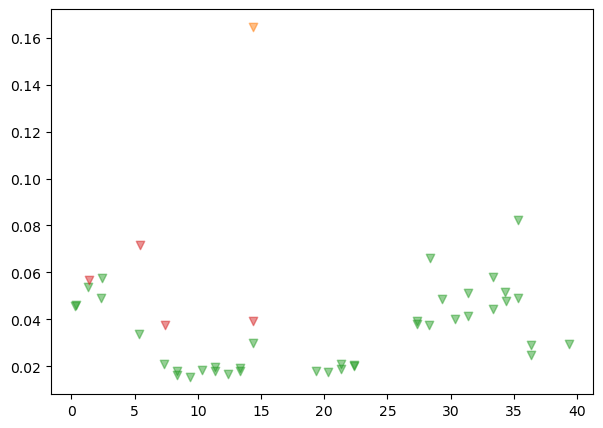

In [ ]:
oids = sorted(df_clean["oid"].dropna().unique().tolist())

print("Plotting", len(oids), "SNe")

for oid in oids:
    pred_df = m.predict_tail(oid)
    ax = plot_tail_models(oid, df_clean, pred_df, save_path=PLOTS_DIR / f"{oid}_tail_model.png")